In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

In [3]:
df.shape

(9134, 24)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.describe() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
df.columns #Para conocer nuestros datos

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
df.Response.head() #Para saber si respondieron a las llamadas o no

0    No
1    No
2    No
3    No
4    No
Name: Response, dtype: object

In [8]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x=='No' else 1) #Creando nueva columna para almacenar 1 y 0

In [9]:
df.Engaged.tail()

9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, dtype: int64

In [10]:
df.shape[0] #total de filas que tenemos.

9134

In [11]:
#Obteniendo porcentajes de clientes que contestaron y que no.
engagement_rate_df = pd.DataFrame(df.groupby('Engaged').count()['Response']/df.shape[0]*100)

In [12]:
engagement_rate_df.T #85% de las personas no contestan las llamadas de marketing

Engaged,0,1
Response,85.679877,14.320123


In [13]:
#Revisando por tipo de oferta
engagement_by_offer_type = pd.pivot_table(df, values='Response', index='Renew Offer Type', columns='Engaged',
                                         aggfunc=len).fillna(0)

In [14]:
engagement_by_offer_type.columns=['Not Engaged', 'Engaged']
engagement_by_offer_type #Podemos ver que la oferta 2 tuvo mejor respuesta que las otras.

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


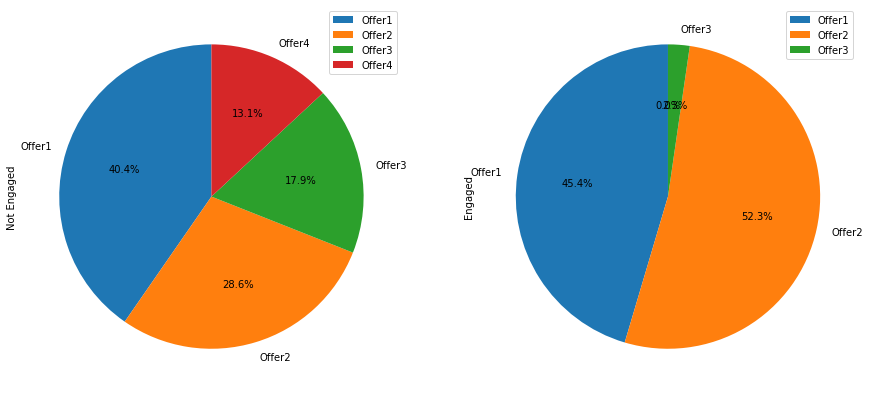

In [15]:
engagement_by_offer_type.plot( #Creando una gráfica para visualizar mejor los resultados
    kind='pie',
    figsize=(15,7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)
plt.show()

In [16]:
engagement_by_sales_channel= pd.pivot_table(df, values='Response', index='Sales Channel', columns='Engaged',
                                           aggfunc=len).fillna(0) #Nueva tabla para visualizar canales de venta

In [17]:
engagement_by_sales_channel.columns=['Not Engaged', 'Engaged']
engagement_by_sales_channel #Podemos ver que los agentes tuvieron mejores resultados que los otros canales de venta.

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


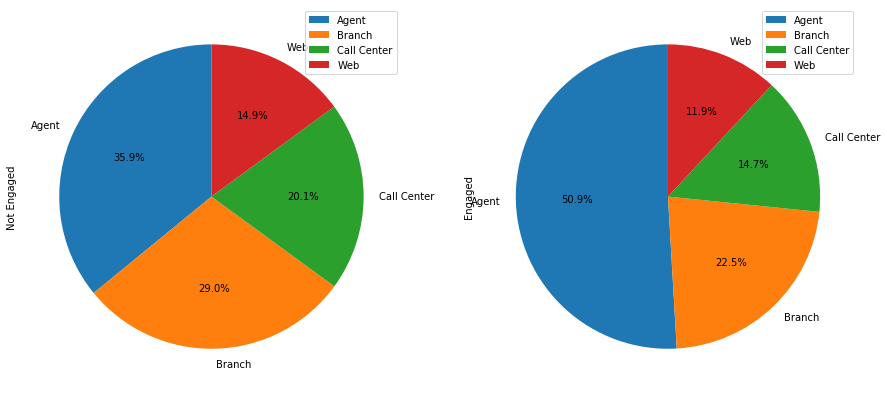

In [18]:
engagement_by_sales_channel.plot(
    kind='pie',
    figsize=(15,8),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' %x
)
plt.show()

#### Differences in the distributions of Total Claim Amount between the engaged and not engaged groups

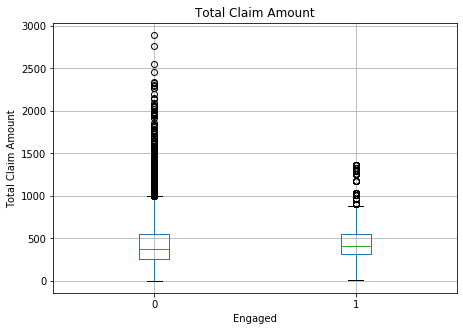

In [25]:
ax = df[["Engaged", "Total Claim Amount"]].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)
ax.set_xlabel("Engaged")
ax.set_ylabel("Total Claim Amount")
plt.suptitle("")
plt.show()

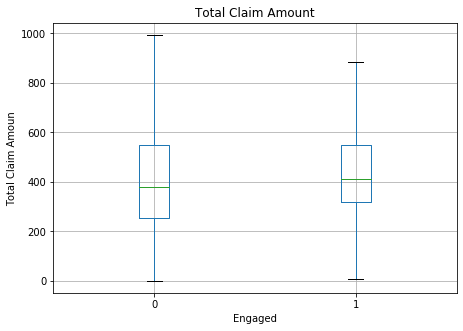

In [26]:
ax = df[["Engaged", "Total Claim Amount"]].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)
ax.set_xlabel("Engaged")
ax.set_ylabel("Total Claim Amoun")
plt.suptitle("")
plt.show()

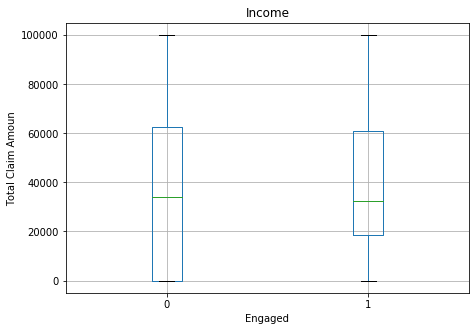

In [38]:
ax = df[["Engaged", "Income"]].boxplot(
    by='Engaged',
    showfliers=False,
    figsize=(7,5)
)
ax.set_xlabel("Engaged")
ax.set_ylabel("Total Claim Amoun")
plt.suptitle("")
plt.show()

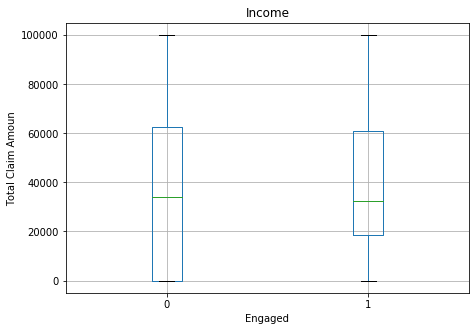

In [39]:
ax = df[["Engaged", "Income"]].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)
ax.set_xlabel("Engaged")
ax.set_ylabel("Total Claim Amoun")
plt.suptitle("")
plt.show()

In [40]:
df.groupby("Engaged").describe()["Income"].T

Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


In [27]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [31]:
# Storing the columns that are numeric in a list
numeric_variables =[i for i in df._get_numeric_data().columns]
numeric_variables

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Engaged']

In [71]:
df[numeric_variables]

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,0
1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0
3,7645.861827,0,106,18,65,0,7,529.881344,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,1
9131,8163.890428,0,85,9,37,3,2,790.784983,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0


In [44]:
import statsmodels.api as sm
logit = sm.Logit(
    df["Engaged"],
    df[numeric_variables]
)

In [75]:
#Check warning
logit_fit = logit.fit()

         Current function value: 0.000000
         Iterations: 35


/home/reynaldo/Desktop/DataAnalytics/proyectos/proyectos/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [76]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9125
Method:                           MLE   Df Model:                            8
Date:                Sat, 28 Mar 2020   Pseudo R-squ.:                   1.000
Time:                        23:06:51   Log-Likelihood:            -4.4370e-05
converged:                      False   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value           0.0010      0.189      0.005      0.996      -0.369       0.371
Income                         -1.84e-05      0.007     -0.002      0.998      -0.015       0.014
Monthly Premium Auto             -0.5831     78.959     -0.007      0.994    -155.340     154.174
Months Since Last Claim          -0.0599     19.430     -0.003      0.998     -38.142      38.023
Months Since Policy Inception    -0.0233      5.426     -0.004      0.997     -10.659      10.612
Number of Open Complaints         0.1334    223.138      0.001      1.000    -437.209     437.475
Number of Policies                1.6244    510.897      0.003      0.997    -999.716    1002.964
Total Claim Amount                0.0003      1.268      0.000      1.000      -2.485       2.486
Engaged                         172.9780   1.97e+04      0.009      0.993   -3.85e+04    3.89e+04
=================================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [77]:
#Encoding categorical values
gender_values, gender_labels = df["Gender"].factorize()

In [78]:
gender_values

array([0, 0, 0, ..., 1, 1, 1])

In [79]:
gender_labels

Index(['F', 'M'], dtype='object')

In [81]:
type(gender_labels)

pandas.core.indexes.base.Index

In [84]:
df["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [94]:
categories = pd.Categorical(
    df["Education"],
    categories = ["High School or Below", "Bachelor", "College", "Master", "Doctor"]
)
categories

[Bachelor, Bachelor, Bachelor, Bachelor, Bachelor, ..., Bachelor, College, Bachelor, College, College]
Length: 9134
Categories (5, object): [High School or Below, Bachelor, College, Master, Doctor]

In [95]:
df["GenderFactorized"] = gender_values
df["EducationFactorized"] = categories.codes

In [96]:
df[["GenderFactorized", "EducationFactorized"]].head()

,GenderFactorized,EducationFactorized
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1


In [97]:
logit = sm.Logit(
    df["Engaged"],
    df[['GenderFactorized', "EducationFactorized"]]
)

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [98]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Sat, 28 Mar 2020   Pseudo R-squ.:                 -0.2005
Time:                        23:26:03   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

With these information we can tell:
High negative correlation with both of the categories, suggesting that male categorie is less likely to engage
with marketing calls. And the highest the education level of the customers, the less likely that they will be
engaged with marketing calls.

In [99]:
logit = sm.Logit(
    df["Engaged"],
    df[[
        "Customer Lifetime Value",
        "Income",
        "Monthly Premium Auto",
        "Months Since Last Claim",
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [100]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Sat, 28 Mar 2020   Pseudo R-squ.:                -0.02454
Time:                        23:31:57   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

1. The higher the income is, the less likely that the customer will be engaged with marketing calls. 
2. The more policies that the customer has, the less likely that he or she will be engaged with marketing calls.
3. Male customers are less likely to engage with marketing calls than female customers (GenderFactorized coef)
4. Attributes of customers are more negatively correlated to customer engagement with marketing calls.